# Week 1 - Notes

---

## Parameter Learning - _Gradient Descent_

**Problem setup:**

We have some function J(&theta;<sub>0</sub>, &theta;<sub>1</sub>)

We want min<sub>&theta;<sub>0</sub>, &theta;<sub>1</sub></sub>  J(&theta;<sub>0</sub>, &theta;<sub>1</sub>)

**Algorithm:** 
1. Start with some initial guess for &theta;<sub>0</sub>, &theta;<sub>1</sub>. (Traditionally &theta;<sub>0</sub> = 0, &theta;<sub>1</sub> = 0). 
2. Keep changing &theta;<sub>0</sub>, &theta;<sub>1</sub> slightly to reduce J(&theta;<sub>0</sub>, &theta;<sub>1</sub>) and eventually reach the minimum.

### 1. Intuition of gradient descent

![Gradient descent intuition](https://i.imgur.com/T1S6CwS.png)

This is a depiction of a cost function J(&theta;<sub>0</sub>, &theta;<sub>1</sub>) over two features.

Imagine this function is a physical landscape, and you are standing on top of one of the red hills. Gradient descent says: 

> "I want to get to the bottom of the deepest valley as quickly as possible. If I have to take a single step in some direction, which direction takes me there as quickly as possible?"

Then repeat, and repeat, until you reach a _local minimum_.

Gradient descent has an interesting property: there is an element of randomness to it, because the local minimum at which it concludes depends on where it begins.


### 2. Formally: gradient descent

![Gradient descent algorithm](https://i.imgur.com/WgbuKZT.png)

Where

* := represents assignment (not a truth assertion)
* &alpha; = learning rate (if alpha is large, gradient descent is aggressive, and visa versa). This term controls "how big of a step" we will take toward the local minima
* {derivative term} = The partial derivative (**_FOC - First Order Condition_**) of the cost function J(&theta;<sub>0</sub>, &theta;<sub>1</sub>) with respect to &theta;<sub>j</sub>

Every iteration, &theta;<sub>j</sub> will move slightly toward the local minimum (proportial to &alpha;). As J(&theta;<sub>0</sub>, &theta;<sub>1</sub>) approaches a local minimum, gradient descent will change  &theta;<sub>j</sub> by smaller and smaller amounts until it stops changing it at all (because, at a local minimum, the FOC of J(&theta;<sub>0</sub>, &theta;<sub>1</sub>) = 0).

Again, gradient descent automatically takes smaller and smaller steps as it approaches a local minimum, so there is no need to decrease the learning rate &alpha;.

It's important to note that the assignments to &theta;<sub>0</sub>, &theta;<sub>1</sub> are intended to be _simultaneous updates_, i.e.

```Python
temp0 = theta0 - a * {derivative term} * J(theta0, theta1)
temp1 = theta1 - a * {derivative term} * J(theta0, theta1)
theta0 = temp0
theta1 = temp1
```

The learning rate &alpha; controls how quickly gradient descent moves toward the local minima. If &alpha; is too small, gradient descent can be slow. If &alpha; is too large, gradient descent can overshoot the minimum (and fail to converge, or even diverge). 

A small &alpha; will find the minimum most accurately, but, in practice, a small alpha will be too slow for productionized applications of gradient descent.

---

### 3. Applying gradient descent to regression

Now we will apply gradient descent to the linear regression's squared error cost function.

h<sub>&theta;</sub>(x) = &theta;<sub>o</sub> x + &theta;<sub>1</sub>x

J(&theta;<sub>o</sub>, &theta;<sub>1</sub>) = 1 / 2m &Sigma;( h<sub>&theta;</sub>(x<sub>(i)</sub>) - y<sub>(i)</sub> )<sup>2</sup>

J(&theta;<sub>o</sub>, &theta;<sub>1</sub>) = 1 / 2m &Sigma;( &theta;<sub>o</sub> x + &theta;<sub>1</sub>x - y<sub>(i)</sub> )<sup>2</sup>

The derivative terms of gradient descent given the above J(&theta;<sub>o</sub>, &theta;<sub>1</sub>) for j = 0,1 are the following:

![FOCs gradient descent](https://i.imgur.com/5MthAqm.png)

Then, after plugging those into the gradient descent algorithm:

![Gradient descent algorithm](https://i.imgur.com/XIBpkfO.png)

This gradient descent algorithm is called **Batch gradient descent**, since, in every step of the algorithm, we end up computing over the entire training set in every iteration of the algorithm.

---

In [6]:
# Python implementation of the linear regression algorithm using
# batch gradient descent
# Input: Training set, (x, y)
#        a, learning rate
#        n, convergence criteria
# Output: (theta_0, theta_1), parameters of J such that
#         J(theta_0, theta_1) is at a global minimum
def linear_regression(x, y, a, n):
    m = len(x)
    theta_0 = 0
    theta_1 = 0
    
    while True:
        theta_0_sum = 0
        theta_1_sum = 0
        for i in range(m):
            theta_0_sum += (theta_0 * x[i] + theta_1 * x[i]) - y[i]
            theta_1_sum += (theta_0 * x[i] + theta_1 * x[i] - y[i]) * x[i]
        if (abs(theta_0_sum) < n and abs(theta_1_sum) < n):
            break
        else:
            theta_0 = theta_0 - (a / m) * theta_0_sum
            theta_1 = theta_1 - (a / m) * theta_1_sum
    
    return theta_0, theta_1


---

### Q:

> Do we need to worry about reaching the wrong local minimum for linear regression?

**_No_**. Gradient descent for linear regression always converges to the global minimum, because the cost functions of all linear regressions form a smooth, distinct bow shape (only a single local minimum, the global minimum).

> Isn't there any easier way to solve a linear regression than gradient descent?

**_Yes_**. There is a simpler mathematic way to find the global minimum of a linear regression cost function. However, it is good to learn gradient descent because of its applications in other machine learning algorithms. Plus, gradient descent _does_ solve the linear regression problem better than other methods at scale.

In [16]:
# Testing the linear regression algorithm

x = [20, 16, 19.79999924, 18.39999962, 17.10000038, 15.5, 14.69999981, 17.10000038, 15.39999962, 16.20000076, 15, 17.20000076, 16, 17, 14.39999962]
y = [88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847, 75.19999695, 69.69999695, 82, 69.40000153, 83.30000305, 79.59999847, 82.59999847, 80.59999847, 83.5, 76.30000305]
a = .001
n = 10

print (linear_regression(x, y, a, n))

(0.2736639139907445, 4.515817601382843)


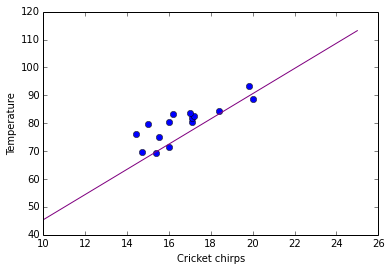

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fn_x = np.linspace(10, 25, 100)

plt.plot(x, y, 'bo')
plt.plot(fn_x, 0.2737 + 4.5158 * fn_x, 'purple')
plt.xlabel("Cricket chirps")
plt.ylabel("Temperature")
plt.show()